**Import the Relevant Libraries**

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

**Data Generation**

In [ ]:
observations = 1000

xs = np.random.uniform(-10,10,(observations,1))
zs = np.random.uniform(-10,10,(observations,1))

generated_inputs = np.column_stack((xs,zs))

noise = np.random.uniform(-1,1,(observations,1))

generated_targets = 2*xs + 3*zs + 5 + noise

np.savez('TF_intro', inputs = generated_inputs, targets = generated_targets) #Syntax:(FileName, Label = Data)

**Solving with TensorFLow**

In [ ]:
training_data = np.load('TF_intro.npz')

In [ ]:
input_size = 2
output_size = 1

model = tf.keras.Sequential([
    tf.keras.layers.Dense(output_size,
    kernel_initializer = tf.random_uniform_initializer(minval=-0.1,maxval=0.1),
    bias_initializer = tf.random_uniform_initializer(minval=-0.1,maxval=0.1)) ]) #Calculates the dot product, just like, np.dot(inputs,weights) + bias

custom_optimizer = tf.keras.optimizers.SGD(learning_rate = 0.02) #Stochastic Gradient Descent

model.compile(optimizer = custom_optimizer, loss = 'mean_squared_error')

model.fit(training_data['inputs'], training_data['targets'], epochs = 100, verbose = 2)  #An epoch is an iteration over the entire x and y

Epoch 1/100
32/32 - 1s - loss: 23.2932 - 522ms/epoch - 16ms/step
Epoch 2/100
32/32 - 0s - loss: 1.2431 - 62ms/epoch - 2ms/step
Epoch 3/100
32/32 - 0s - loss: 0.4113 - 65ms/epoch - 2ms/step
Epoch 4/100
32/32 - 0s - loss: 0.3900 - 63ms/epoch - 2ms/step
Epoch 5/100
32/32 - 0s - loss: 0.3741 - 67ms/epoch - 2ms/step
Epoch 6/100
32/32 - 0s - loss: 0.3825 - 65ms/epoch - 2ms/step
Epoch 7/100
32/32 - 0s - loss: 0.3773 - 57ms/epoch - 2ms/step
Epoch 8/100
32/32 - 0s - loss: 0.3829 - 63ms/epoch - 2ms/step
Epoch 9/100
32/32 - 0s - loss: 0.4055 - 59ms/epoch - 2ms/step
Epoch 10/100
32/32 - 0s - loss: 0.3715 - 48ms/epoch - 2ms/step
Epoch 11/100
32/32 - 0s - loss: 0.3682 - 39ms/epoch - 1ms/step
Epoch 12/100
32/32 - 0s - loss: 0.3445 - 49ms/epoch - 2ms/step
Epoch 13/100
32/32 - 0s - loss: 0.3811 - 43ms/epoch - 1ms/step
Epoch 14/100
32/32 - 0s - loss: 0.4538 - 45ms/epoch - 1ms/step
Epoch 15/100
32/32 - 0s - loss: 0.3800 - 40ms/epoch - 1ms/step
Epoch 16/100
32/32 - 0s - loss: 0.3963 - 41ms/epoch - 1ms/ste

**Extract the Weights and Bias**

In [ ]:
model.layers[0].get_weights()

[array([[1.9528736],
        [3.0605721]], dtype=float32),
 array([5.021621], dtype=float32)]

In [ ]:
weights = model.layers[0].get_weights()[0]
weights

array([[1.9528736],
       [3.0605721]], dtype=float32)

In [ ]:
bias = model.layers[0].get_weights()[1]
bias

array([5.021621], dtype=float32)

**Extract the outputs (make predictions)**

In [ ]:
model.predict_on_batch(training_data['inputs']).round(1)

array([[  1.3],
       [-18.9],
       [  8.3],
       [  7.6],
       [ -4.4],
       [-27.9],
       [-18.9],
       [ -0.8],
       [-15.1],
       [  2.6],
       [ -1.4],
       [ 39.1],
       [-14.8],
       [-22.1],
       [-23.9],
       [ 35.9],
       [ -7.7],
       [-17.9],
       [ 19.2],
       [ -4.6],
       [ -2.9],
       [ 14.3],
       [ 44.7],
       [ 24.1],
       [ 15.8],
       [  3.2],
       [ 24.6],
       [-14.8],
       [ 22. ],
       [-11.8],
       [ -0.6],
       [-18.8],
       [-20.8],
       [ 29.5],
       [ 11.2],
       [-16.6],
       [-10.8],
       [-13.8],
       [-31.6],
       [  0.1],
       [ 41.4],
       [ -1.1],
       [ 29.7],
       [ 36.9],
       [ 19.6],
       [  8.9],
       [ 23.9],
       [ 13.2],
       [  9.8],
       [ -6.2],
       [-11.7],
       [  7.6],
       [ -5.6],
       [ 36.1],
       [ -7.1],
       [ -3.4],
       [-15.3],
       [ 18.7],
       [ 14.1],
       [ 40.3],
       [  0.1],
       [ -8.2],
       [

In [ ]:
training_data['targets'].round(1)

array([[  0.6],
       [-19.5],
       [  7.9],
       [  7.3],
       [ -4.6],
       [-27.2],
       [-18.6],
       [ -1. ],
       [-14.8],
       [  2.6],
       [ -0.9],
       [ 39.8],
       [-13.8],
       [-21. ],
       [-24.4],
       [ 34.6],
       [ -7.5],
       [-17.9],
       [ 18.8],
       [ -5.3],
       [ -2.7],
       [ 15.5],
       [ 43.8],
       [ 23.7],
       [ 15.4],
       [  2.8],
       [ 23.8],
       [-16. ],
       [ 22.6],
       [-11.3],
       [ -0.8],
       [-18.8],
       [-20.9],
       [ 28.9],
       [ 12.5],
       [-17.5],
       [-10.1],
       [-13. ],
       [-32.3],
       [  0.2],
       [ 41.7],
       [ -1.4],
       [ 30. ],
       [ 36.6],
       [ 20. ],
       [  8.5],
       [ 23.5],
       [ 13.8],
       [  9.5],
       [ -6.2],
       [-12.5],
       [  6.7],
       [ -6.4],
       [ 35.6],
       [ -7.1],
       [ -3. ],
       [-14.6],
       [ 17.4],
       [ 13.2],
       [ 39.1],
       [ -0.3],
       [ -8.5],
       [

**Plotting the Data**

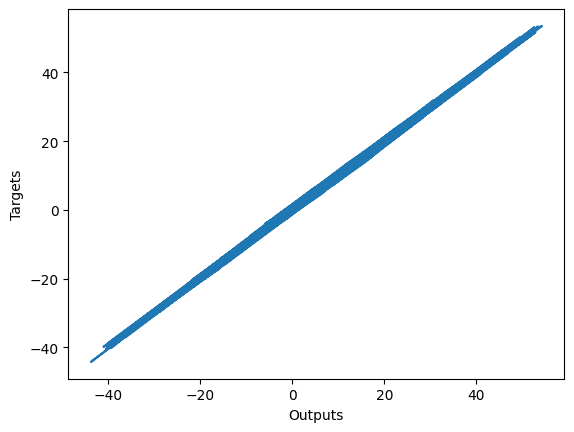

In [ ]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['targets']))
plt.xlabel('Outputs')
plt.ylabel('Targets')
plt.show()